In [1]:
import numpy as np
import math
import pandas as pd 
import seaborn as sns 
from itertools import combinations
from functools import reduce
from scipy.special import binom
import matplotlib.pyplot as plt

In [59]:
# parameters of queue 
lbd = 700;                     # lambda == średnia częstość przybywania zgłoszeń do systemu
mu = [100,100,100, 80, 80]       # mu == średni czas obsługi zgłoszeń przez system [kanły typu - 1 x3, kanały typu - 2 x2]
ro = [lbd / i for i in mu]     # ro == intensywność obciążenia
m = len(mu)
N = 4; 

<Figure size 1152x576 with 0 Axes>

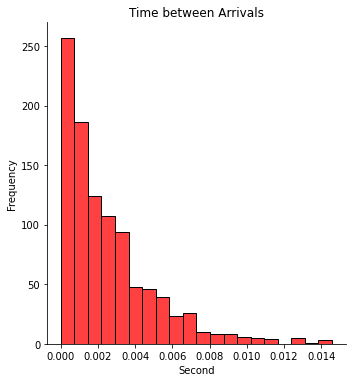

In [3]:
ia_times = list(np.random.exponential(scale=1/lbd,size=1000))
#plotting data
plt.figure(figsize=(16,8))
sns.displot(ia_times,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Second')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [4]:
def get_SK(k, ro):
    SK = combinations(ro, k)
    SK_val = [reduce(lambda x, y: x*y, i) for i in SK]
    return np.sum(SK_val)

In [60]:
def init_cond(m, ro):
    return get_SK(m, ro)/ get_SK(m-1, ro)

print(init_cond(m,ro))

1.5217391304347827


In [54]:
def get_pi0(m, N, ro):
    s1 = np.sum([get_SK(i, ro)/(math.factorial(i)*binom(m, i)) for i in range(1, m)])
    if init_cond(m, ro) == 1:
        s2 = np.sum([(get_SK(m, ro)*(N+1))/math.factorial(m) for i in range(m, m+N)])
        return (1+s1+s2)**(-1)
    else:
        s2 = (get_SK(m,ro)/math.factorial(m)) * ((1-(init_cond(m,ro)**(N+1)))/(1-init_cond(m,ro)))
        return (1+s1+s2)**(-1)
    

In [7]:
def get_pi(i, m, N, ro, pi0):
    if i in range(1,m):
        return pi0*get_SK(i, ro)/(math.factorial(i)*binom(m, i))
    elif i in range(m, m+N):
        return pi0*(np.power(get_SK(m,ro),(i-m+1)))/(math.factorial(m)*np.power(get_SK(m-1, ro),(i-m)))

In [8]:
def job_lost_prob(m,N,ro, pi0):
    return ((get_SK(m,ro)**(N+1))/(math.factorial(m)*(get_SK(m-1,ro)**N)))*pi0

In [9]:
def mean_busy_servers(m, N, ro, pi0):
    return (m*init_cond(m,ro))*(1-((get_SK(m,ro)**(N+1))/(math.factorial(m)*(get_SK(m-1,ro)**(N))))*pi0)

In [63]:
def mean_q_size(m, N, ro, pi0):
    if init_cond(m, ro) >= 0.97 and init_cond(m, ro) <= 1.03:
        return (get_SK(m,ro)/(2*math.factorial(m)))*N*(N+1)*pi0
    else:
        return ((get_SK(m,ro)**2)/math.factorial(m)) * get_SK(m-1,ro) * ((1-(np.power(init_cond(m,ro),N)*(1-N*(1-init_cond(m, ro)))))
                                                                       /((get_SK(m-1, ro) - get_SK(m, ro))**2))*pi0

In [11]:
# parameters of queue 
lbd = 1;                     # lambda == średnia częstość przybywania zgłoszeń do systemu
mu = [2, 4]       # mu == średni czas obsługi zgłoszeń przez system [kanły typu - 1 x3, kanały typu - 2 x2]
ro = [lbd / i for i in mu]     # ro == intensywność obciążenia
m = len(mu)
N = 100; 

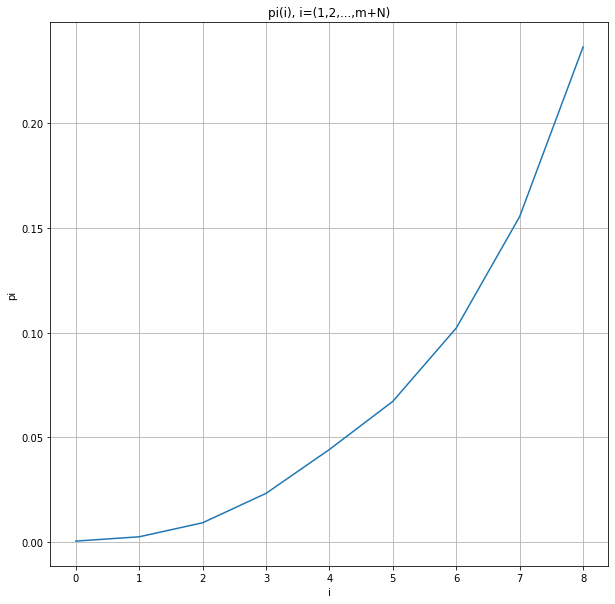

In [64]:
pi0 = get_pi0(m, N, ro)
pi = [get_pi(i, m, N, ro, pi0) for i in range(1, m+N+1)]
pi = [pi0] + pi

nums = range(m+N+1)

plt.figure(figsize=(10,10))
plt.title('pi(i), i=(1,2,...,m+N)')
plt.plot(nums, pi)
    
plt.xlabel('i')
plt.ylabel('pi')
plt.grid()
plt.show()

In [65]:
print("Prawdopodobieństwo odmowy: ", job_lost_prob(m,N,ro, pi0))
print("Średnia liczba zajętych kanałów obsługi: ", mean_busy_servers(m,N,ro,pi0))
print("Średnia liczba zgłoszeń w kolejce: ", mean_q_size(m,N,ro, pi0))
print("Średni czas oczekiwania zgłoszenia: ", mean_q_size(m,N,ro, pi0)/lbd)
print("Średni czas w systemie:", (mean_q_size(m,N,ro, pi0)+mean_busy_servers(m,N,ro,pi0))/lbd)

Prawdopodobieństwo odmowy:  0.35989018544703805
Średnia liczba zajętych kanałów obsługi:  4.870400762902972
Średnia liczba zgłoszeń w kolejce:  0.6711338901170152
Średni czas oczekiwania zgłoszenia:  0.0009587627001671645
Średni czas w systemie: 0.007916478075742838


In [14]:
combinations(ro, 0)

In [15]:
list(combinations(ro,0))

[()]

In [16]:
np.sum(list(combinations(ro,0)))

0.0

In [17]:
np.sum(0.0)

0.0